# Data Wrangling & Cleaning

In [1]:
# import the library
%matplotlib inline

import ast
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# convert scientific notation to decimals
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', 24)

### Load the data

Datasets *movies_metadata.csv*, *credits.csv* and *keywords.csv* can be downloaded here:
https://www.kaggle.com/rounakbanik/the-movies-dataset

In [2]:
movies = pd.read_csv('data/movies_metadata.csv')
cast = pd.read_csv('data/credits.csv')
keywords = pd.read_csv('data/keywords.csv')

C:\Users\Anastasia\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Summarizing our data for inspection

In [3]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.95,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.00,81.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.70,5415.00
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.02,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.00,104.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.90,2413.00
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.71,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.00,101.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.50,92.00
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.86,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.00,127.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.10,34.00
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.39,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.00,106.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.70,173.00


In [4]:
print('Movies Info')
print(movies.columns)
print(movies.describe())
print(movies.dtypes)

Movies Info
Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')
            revenue  runtime  vote_average  vote_count
count      45460.00 45203.00      45460.00    45460.00
mean    11209348.54    94.13          5.62      109.90
std     64332246.74    38.41          1.92      491.31
min            0.00     0.00          0.00        0.00
25%            0.00    85.00          5.00        3.00
50%            0.00    95.00          6.00       10.00
75%            0.00   107.00          6.80       34.00
max   2787965087.00  1256.00         10.00    14075.00
adult                     object
belongs_to_collection     object
budget                  

In [5]:
cast.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [6]:
print('Cast')
print(cast.columns)
print(cast.describe())

Cast
Index(['cast', 'crew', 'id'], dtype='object')
             id
count  45476.00
mean  108346.00
std   112443.80
min        2.00
25%    26443.25
50%    60002.50
75%   157302.00
max   469172.00


In [7]:
keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [8]:
print('keywords')
print(keywords.columns)
print(keywords.describe())

keywords
Index(['id', 'keywords'], dtype='object')
             id
count  46419.00
mean  109769.95
std   113045.78
min        2.00
25%    26810.50
50%    61198.00
75%   159908.50
max   469172.00


### Fixing columns and types

In [9]:
#Choosing the columns we will need for our analysis
movies = movies.loc[:,['id','title', 'budget', 'revenue', 'production_countries', 'release_date', 'status', 'popularity', 'vote_average', 'vote_count', 'genres', 'production_companies', 'belongs_to_collection']]
print(movies.dtypes)

id                        object
title                     object
budget                    object
revenue                  float64
production_countries      object
release_date              object
status                    object
popularity                object
vote_average             float64
vote_count               float64
genres                    object
production_companies      object
belongs_to_collection     object
dtype: object


In [10]:
movies.head()

,id,title,budget,revenue,production_countries,release_date,status,popularity,vote_average,vote_count,genres,production_companies,belongs_to_collection
0,862,Toy Story,30000000,373554033.00,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,Released,21.95,7.70,5415.00,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'name': 'Pixar Animation Studios', 'id': 3}]","{'id': 10194, 'name': 'Toy Story Collection', ..."
1,8844,Jumanji,65000000,262797249.00,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,Released,17.02,6.90,2413.00,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'name': 'TriStar Pictures', 'id': 559}, {'na...",NaN
2,15602,Grumpier Old Men,0,0.00,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,Released,11.71,6.50,92.00,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","{'id': 119050, 'name': 'Grumpy Old Men Collect..."
3,31357,Waiting to Exhale,16000000,81452156.00,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,Released,3.86,6.10,34.00,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",[{'name': 'Twentieth Century Fox Film Corporat...,NaN
4,11862,Father of the Bride Part II,0,76578911.00,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,Released,8.39,5.70,173.00,"[{'id': 35, 'name': 'Comedy'}]","[{'name': 'Sandollar Productions', 'id': 5842}...","{'id': 96871, 'name': 'Father of the Bride Col..."


### Handeling NANs

In [11]:
#checking for the NAN in Movies
#replacing nan in belongs to collection by zero
movies['belongs_to_collection'] = [0 if len(str(col))<5  else col for i, col in enumerate(movies['belongs_to_collection'])]
print('Number of NAN per feature in movies: \n', movies.isnull().sum())
#deleting rows containing NAN
del_index = movies[movies.isnull().any(axis=1)].index
movies.drop(del_index, inplace=True)
print('\nNumber of NAN after removing in movies: \n', movies.isnull().sum())

#checking for the NAN in Cast
print('Number of NAN per feature in cast: \n', cast.isnull().sum())
#deleting rows containing NAN
del_index = cast[cast.isnull().any(axis=1)].index
cast.drop(del_index, inplace=True)
print('\nNumber of NAN after removing in Cast: \n', cast.isnull().sum())

#checking for the NAN in Keywords
print('Number of NAN per feature in keywords: \n', keywords.isnull().sum())
#deleting rows containing NAN
del_index = keywords[keywords.isnull().any(axis=1)].index
keywords.drop(del_index, inplace=True)
print('\nNumber of NAN after removing in keywords: \n', keywords.isnull().sum())

Number of NAN per feature in movies: 
 id                        0
title                     6
budget                    0
revenue                   6
production_countries      3
release_date             87
status                   87
popularity                5
vote_average              6
vote_count                6
genres                    0
production_companies      3
belongs_to_collection     0
dtype: int64

Number of NAN after removing in movies: 
 id                       0
title                    0
budget                   0
revenue                  0
production_countries     0
release_date             0
status                   0
popularity               0
vote_average             0
vote_count               0
genres                   0
production_companies     0
belongs_to_collection    0
dtype: int64
Number of NAN per feature in cast: 
 cast    0
crew    0
id      0
dtype: int64

Number of NAN after removing in Cast: 
 cast    0
crew    0
id      0
dtype: int64
Number of NAN

In [12]:
#reassigning the numeric types
  
#id:
print('Adjusting the type of ID:')
movies['id'] = movies['id'].astype(int)
print('Type of id: ', movies['id'].dtype)

#budget:
print('\nAdjusting the type of budget:')
movies['budget'] = movies['budget'].astype(int)
print('Type of budget: ', movies['budget'].dtype)

#popularity to float:
print('\nAdjusting the type of popularity to float:')
movies['popularity'] = movies['popularity'].astype(float)
print('Type of popularity: ', movies['popularity'].dtype)

#date to datetime
print('\nAdjusting the type of relese_date:')
movies['release_date'] = pd.to_datetime(movies['release_date'])
print('Type of release date: ', movies['release_date'].dtype)

#id of cast
print('\nAdjusting the type of ID of cast dataset:')
cast['id'] = cast['id'].astype(int)
print('Type of id: ', cast['id'].dtype)

#id of keywords
print('\nAdjusting the type of ID of keywords dataset:')
keywords['id'] = keywords['id'].astype(int)
print('Type of id: ', keywords['id'].dtype)

Adjusting the type of ID:
Type of id:  int32

Adjusting the type of budget:
Type of budget:  int32

Adjusting the type of popularity to float:
Type of popularity:  float64

Adjusting the type of relese_date:
Type of release date:  datetime64[ns]

Adjusting the type of ID of cast dataset:
Type of id:  int32

Adjusting the type of ID of keywords dataset:
Type of id:  int32


In [13]:
#Taking out the movies with 0 budget
del_index = movies[movies['budget'] == 0].index
movies_zero = movies[movies['budget'] == 0] #saved a copy of a 0 budget movies
movies.drop(del_index, inplace=True)
print('\nRemoved ', len(del_index), 'movies with 0 budget and saved a copy of them to the new DataFrame')

#Taking out the movies with <100 budget
del_count = movies[movies['budget'] <= 100]['budget'].count()
movies =  movies[movies['budget'] > 100]
print('\nRemoved ', del_count, 'movies with budget of less then $100')

#Taking out the movies with 0 revenue
del_index = movies[movies['revenue'] == 0].index
movies.drop(del_index, inplace=True)
print('\nRemoved ', len(del_index), 'movies with 0 revenue')

#Taking out the movies with <100 revenue
del_count = movies[movies['revenue'] <= 100]['revenue'].count()
movies =  movies[movies['revenue'] > 100]
print('\nRemoved ', del_count, 'movies with revenue of less then $100')

movies.reset_index(drop=True, inplace=True)


Removed  36413 movies with 0 budget and saved a copy of them to the new DataFrame

Removed  142 movies with budget of less then $100

Removed  3400 movies with 0 revenue

Removed  20 movies with revenue of less then $100


In [14]:
#Keeping only released movies
print('\nMovie status options: ', movies['status'].unique())
movies = movies[movies['status'] == 'Released']
movies.reset_index(drop=True, inplace=True)
print('\nMovie status options after removing all but Released: ', movies['status'].unique())

#Removing status feature
del(movies['status'])


Movie status options:  ['Released' 'Rumored' 'Post Production']

Movie status options after removing all but Released:  ['Released']


In [15]:
#Removing movies with 0 popularity
del_index = movies[movies['popularity'] == 0].index
movies.drop(del_index, inplace=True)
print('\nRemoved ', len(del_index), 'movies with 0 popularity')

#Removing movies with 0 vote_average
del_index = movies[movies['vote_average'] == 0].index
movies.drop(del_index, inplace=True)
print('\nRemoved ', len(del_index), 'movies with 0 vote_average')

movies.reset_index(drop=True, inplace=True)


Removed  0 movies with 0 popularity

Removed  4 movies with 0 vote_average


In [16]:
#handeling production_compagnies
movies['production_companies'] = movies['production_companies'].astype(str)

del_index = movies[movies['production_companies'] == "[]"].index
movies.drop(del_index, inplace=True)
movies.reset_index(drop=True, inplace=True)
print('\nRemoved movies without production companies specified: ', len(del_index))
print('')


Removed movies without production companies specified:  164



In [17]:
#handeling genres
movies['genres'] = movies['genres'].astype(str)

del_index = movies[movies['genres'] == "[]"].index
movies.drop(del_index, inplace=True)
movies.reset_index(drop=True, inplace=True)
print('\nRemoved movies without genres specified: ', len(del_index))
print('')


Removed movies without genres specified:  1



In [18]:
#handeling cast
cast['cast'] = cast['cast'].astype(str)

del_index = cast[(cast['cast'] == "[]")].index
#del_index = cast[(cast['crew'] == "[]")].index
cast.drop(del_index, inplace=True)
cast.reset_index(drop=True, inplace=True)
print('\nRemoved lines without cast specified: ', len(del_index))
print('')

#for now removing crew column in order to speed up the merging process later on. We don't need crew info so far
del(cast['crew'])
cast.head(10)


Removed lines without cast specified:  2418



,cast,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...",11862
5,"[{'cast_id': 25, 'character': 'Lt. Vincent Han...",949
6,"[{'cast_id': 1, 'character': 'Linus Larrabee',...",11860
7,"[{'cast_id': 2, 'character': 'Tom Sawyer', 'cr...",45325
8,"[{'cast_id': 1, 'character': 'Darren Francis T...",9091
9,"[{'cast_id': 1, 'character': 'James Bond', 'cr...",710


In [19]:
#handeling keywords
keywords['keywords'] = keywords['keywords'].astype(str)

del_index = keywords[keywords['keywords'] == "[]"].index
keywords.drop(del_index, inplace=True)
keywords.reset_index(drop=True, inplace=True)
print('\nRemoved lines without keywords specified: ', len(del_index))
print('')


Removed lines without keywords specified:  14795



In [20]:
movies.reset_index(drop=True, inplace=True)
print(movies.head(10))
cast.reset_index(drop=True, inplace=True)
print('')
print(cast.head(10))
keywords.reset_index(drop=True, inplace=True)
print('')
print(keywords.head(10))

      id                   title    budget      revenue  \
0    862               Toy Story  30000000 373554033.00   
1   8844                 Jumanji  65000000 262797249.00   
2  31357       Waiting to Exhale  16000000  81452156.00   
3    949                    Heat  60000000 187436818.00   
4   9091            Sudden Death  35000000  64350171.00   
5    710               GoldenEye  58000000 352194034.00   
6   9087  The American President  62000000 107879496.00   
7  10858                   Nixon  44000000  13681765.00   
8   1408        Cutthroat Island  98000000  10017322.00   
9    524                  Casino  52000000 116112375.00   

                                production_countries release_date  popularity  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-10-30       21.95   
1  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-12-15       17.02   
2  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-12-22        3.86   
3  [{'iso_3166_1': 'US', '

### Dealing with outliers

([<matplotlib.axis.XTick at 0x1a18c0b08d0>],
 <a list of 1 Text xticklabel objects>)

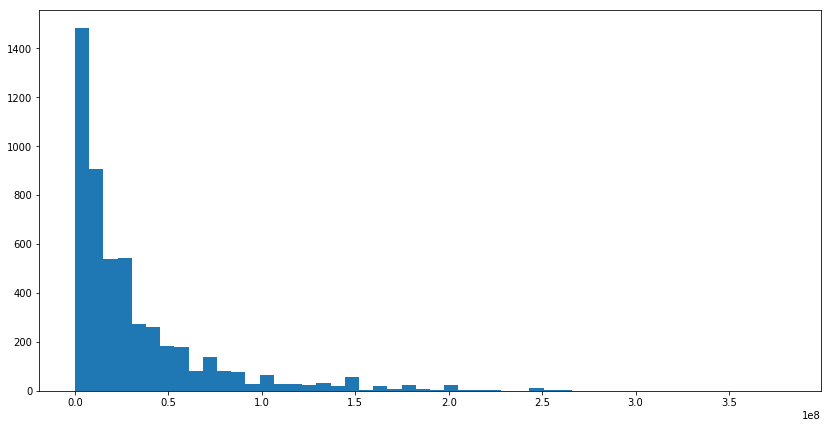

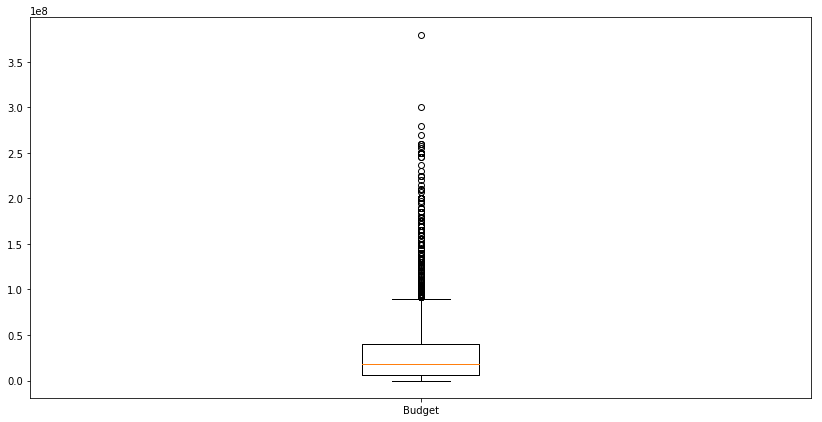

In [21]:
#Budget
movies=movies.sort_values(by='budget')
movies.reset_index(drop=True, inplace=True)

plt.figure(figsize=(14,7))
plt.hist(movies['budget'], bins=50)

plt.figure(figsize=(14,7))
plt.boxplot(movies['budget'])
plt.xticks([1], ['Budget'], rotation='horizontal')

In [22]:
#Removing the outliers

mean_b = np.mean(movies['budget'])
std_b = np.std(movies['budget'])

#print('Budget before removindg outliers: \n', movies['budget'].describe())
print('Min price:', movies['budget'].min())
print('Max price:', movies['budget'].max())
print('Mean: ', round(mean_b))
print('Std:  ', round(std_b))
print('Count rows:', movies['budget'].count())
print('')

#movies new =  mean-3*std < budgets < mean+3*std
#movies = movies[(movies['budget']>mean_b-3*std_b)&(movies['budget']<mean_b+3*std_b)]
print('After removing:')
print('Min price:', movies['budget'].min())
print('Max price:', movies['budget'].max())
print('Count rows:', movies['budget'].count())

Min price: 113
Max price: 380000000
Mean:  32345236
Std:   40602022
Count rows: 5148

After removing:
Min price: 113
Max price: 380000000
Count rows: 5148


([<matplotlib.axis.XTick at 0x1a18c5a7eb8>],
 <a list of 1 Text xticklabel objects>)

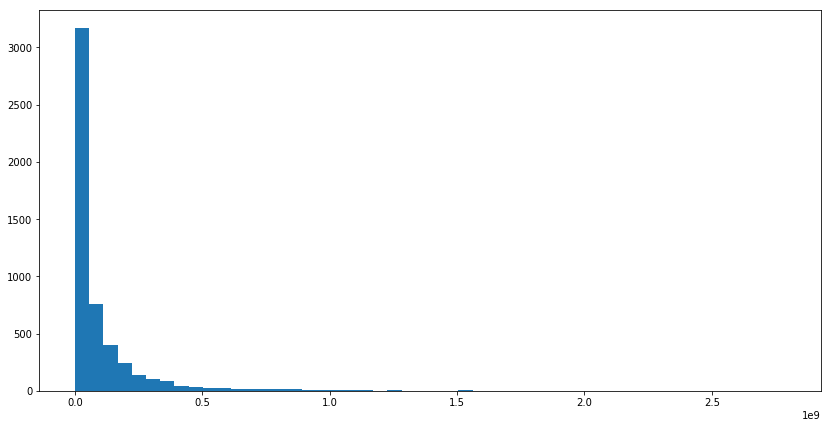

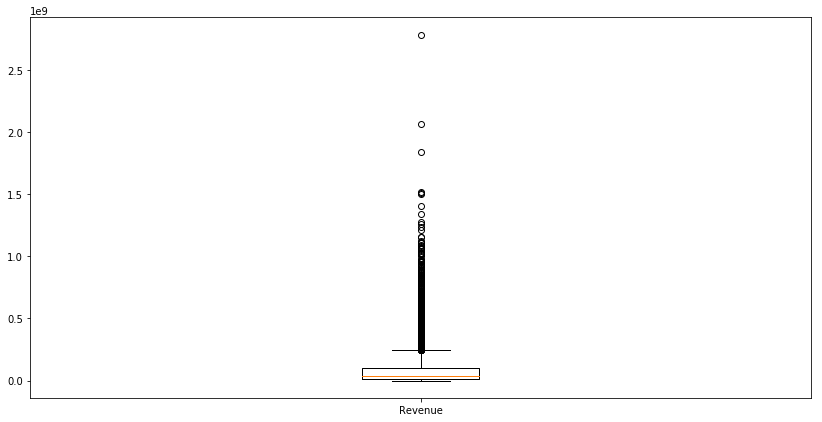

In [23]:
#Revenue
movies=movies.sort_values(by='revenue')
movies.reset_index(drop=True, inplace=True)

plt.figure(figsize=(14,7))
plt.hist(movies['revenue'], bins=50)

plt.figure(figsize=(14,7))
plt.boxplot(movies['revenue'])
plt.xticks([1], ['Revenue'], rotation='horizontal')

In [24]:
# Removing the outliers
# We decided that we should not remove the outlier as there are movies with very high revenue. So we keep them for analysis. 
# We will remove them later on before performing prediction

mean_r = np.mean(movies['revenue'])
std_r = np.std(movies['revenue'])

print('Min revenue:', movies['revenue'].min())
print('Max revenue:', movies['revenue'].max())
print('Mean: ', round(mean_r))
print('Std:  ', round(std_r))
print('Count rows:', movies['revenue'].count())
print('')

#movies new =  mean-3*std < budgets < mean+3*std
#movies = movies[(movies['revenue']>mean_r-3*std_r)&(movies['revenue']<mean_r+3*std_r)]

print('After removing:')
print('Min revenue:', movies['revenue'].min())
print('Max revenue:', movies['revenue'].max())
print('Count rows:', movies['revenue'].count())

Min revenue: 198.0
Max revenue: 2787965087.0
Mean:  94195095
Std:   168801256
Count rows: 5148

After removing:
Min revenue: 198.0
Max revenue: 2787965087.0
Count rows: 5148


([<matplotlib.axis.XTick at 0x1a18cbc1978>],
 <a list of 1 Text xticklabel objects>)

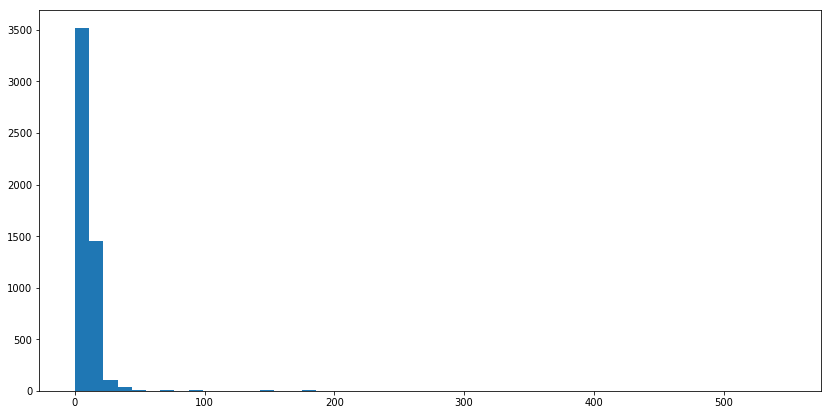

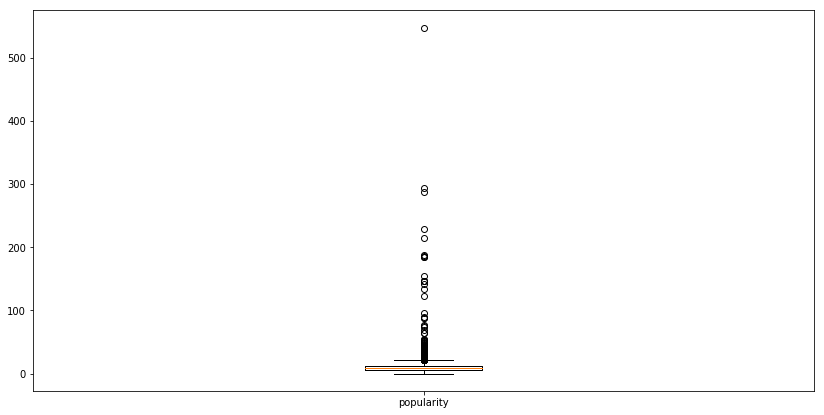

In [25]:
#Popularity
movies=movies.sort_values(by='popularity')
movies.reset_index(drop=True, inplace=True)

plt.figure(figsize=(14,7))
plt.hist(movies['popularity'], bins=50)

plt.figure(figsize=(14,7))
plt.boxplot(movies['popularity'])
plt.xticks([1], ['popularity'], rotation='horizontal')

In [26]:
#Removing the outliers for popularity

mean_r = np.mean(movies['popularity'])
std_r = np.std(movies['popularity'])

print('Min popularity:', movies['popularity'].min())
print('Max popularity:', movies['popularity'].max())
print('Mean: ', round(mean_r))
print('Std:  ', round(std_r))
print('Count rows:', movies['popularity'].count())
print('')

#movies new =  mean-3*std < popularity < mean+3*std
#movies = movies[(movies['popularity']>mean_r-3*std_r)&(movies['popularity']<mean_r+3*std_r)]
# movies = movies[movies['popularity'] < 500]

print('After removing:')
print('Min popularity:', movies['popularity'].min())
print('Max popularity:', movies['popularity'].max())
print('Count rows:', movies['popularity'].count())

Min popularity: 0.030576
Max popularity: 547.4882980000001
Mean:  10
Std:   14
Count rows: 5148

After removing:
Min popularity: 0.030576
Max popularity: 547.4882980000001
Count rows: 5148


### Merge the data

In [27]:
df_merge = movies.copy()
df_merge = df_merge.merge(cast, on='id', how='left')
df_merge = df_merge.merge(keywords, on='id', how='left')
print('Total number of movies: ', len(df_merge))

#checking for the NAN
print('Number of NAN per feature: \n', df_merge.isnull().sum())
#deleting rows containing NAN
del_index = df_merge[df_merge.isnull().any(axis=1)].index
df_merge.drop(del_index, inplace=True)

print('Total number of movies after removing NAN keywords: ', len(df_merge))

Total number of movies:  5209
Number of NAN per feature: 
 id                         0
title                      0
budget                     0
revenue                    0
production_countries       0
release_date               0
popularity                 0
vote_average               0
vote_count                 0
genres                     0
production_companies       0
belongs_to_collection      0
cast                       4
keywords                 256
dtype: int64
Total number of movies after removing NAN keywords:  4949


In [28]:
df_merge.head(10)

,id,title,budget,revenue,production_countries,release_date,popularity,vote_average,vote_count,genres,production_companies,belongs_to_collection,cast,keywords
0,36523,Felix The Cat: The Movie,9000000,1964253.00,"[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",1988-10-01,0.03,3.70,5.00,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...","[{'name': 'Pannónia Filmstúdió', 'id': 48669},...",0,"[{'cast_id': 1, 'character': 'Felix the Cat (V...","[{'id': 9820, 'name': 'alternate dimension'}, ..."
1,68351,Sankofa,1000000,2691899.00,"[{'iso_3166_1': 'BF', 'name': 'Burkina Faso'},...",1993-05-28,0.05,6.90,5.00,"[{'id': 18, 'name': 'Drama'}]","[{'name': 'Channel Four Films', 'id': 181}, {'...",0,"[{'cast_id': 6, 'character': 'Sankofa', 'credi...","[{'id': 409, 'name': 'africa'}, {'id': 2831, '..."
4,285908,The Last Breath,3800000,559298.00,"[{'iso_3166_1': 'CA', 'name': 'Canada'}]",1999-03-25,0.07,4.00,2.00,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...","[{'name': 'Lions Gate Films', 'id': 35}]",0,"[{'cast_id': 0, 'character': 'Lauren Vaillanco...","[{'id': 10714, 'name': 'serial killer'}]"
5,121173,Voracious,11178,34659.00,"[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2012-09-05,0.08,8.00,1.00,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'name': 'APT Entertainment', 'id': 8355}, {'...",0,"[{'cast_id': 16, 'character': 'Rene', 'credit_...","[{'id': 4694, 'name': 'staged death'}, {'id': ..."
7,110669,Wabash Avenue,2115000,2039000.00,"[{'iso_3166_1': 'US', 'name': 'United States o...",1950-03-31,0.11,7.00,1.00,"[{'id': 10402, 'name': 'Music'}]",[{'name': 'Twentieth Century Fox Film Corporat...,0,"[{'cast_id': 1004, 'character': 'Ruby Summers'...","[{'id': 4344, 'name': 'musical'}, {'id': 4497,..."
8,110428,Camille Claudel 1915,3512454,115860.00,"[{'iso_3166_1': 'FR', 'name': 'France'}]",2013-03-13,0.11,7.00,20.00,"[{'id': 18, 'name': 'Drama'}]","[{'name': 'Canal+', 'id': 5358}, {'name': 'Art...",0,"[{'cast_id': 3, 'character': 'Camille Claudel'...","[{'id': 254, 'name': 'france'}, {'id': 745, 'n..."
9,110428,Camille Claudel 1915,3512454,115860.00,"[{'iso_3166_1': 'FR', 'name': 'France'}]",2013-03-13,0.11,7.00,20.00,"[{'id': 18, 'name': 'Drama'}]","[{'name': 'Canal+', 'id': 5358}, {'name': 'Art...",0,"[{'cast_id': 3, 'character': 'Camille Claudel'...","[{'id': 254, 'name': 'france'}, {'id': 745, 'n..."
10,110428,Camille Claudel 1915,3512454,115860.00,"[{'iso_3166_1': 'FR', 'name': 'France'}]",2013-03-13,0.11,7.00,20.00,"[{'id': 18, 'name': 'Drama'}]","[{'name': 'Canal+', 'id': 5358}, {'name': 'Art...",0,"[{'cast_id': 3, 'character': 'Camille Claudel'...","[{'id': 254, 'name': 'france'}, {'id': 745, 'n..."
11,110428,Camille Claudel 1915,3512454,115860.00,"[{'iso_3166_1': 'FR', 'name': 'France'}]",2013-03-13,0.11,7.00,20.00,"[{'id': 18, 'name': 'Drama'}]","[{'name': 'Canal+', 'id': 5358}, {'name': 'Art...",0,"[{'cast_id': 3, 'character': 'Camille Claudel'...","[{'id': 254, 'name': 'france'}, {'id': 745, 'n..."
12,53863,Star of Midnight,280,831.00,"[{'iso_3166_1': 'US', 'name': 'United States o...",1935-04-19,0.11,5.30,3.00,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'name': 'RKO Radio Pictures', 'id': 6}]",0,"[{'cast_id': 4, 'character': ""Clay 'Dal' Dalze...","[{'id': 733, 'name': 'dancer'}, {'id': 163110,..."


### Saving the processed file

In [29]:
df_merge.to_csv('data/movies_new.csv', index=False)